In [1]:
import pandas as pd
import os 
import glob
import numpy as np

In [2]:
# Standard library imports
import os 
import glob
import numpy as np
import itertools

# Third party imports
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold 
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
import lightgbm as LGB
from sklearn.cross_decomposition import PLSRegression
from sklearn.linear_model import Lasso,ElasticNet,Ridge
from sklearn.svm import SVR

from tqdm import tqdm
import plotly 
import plotly.express as px
import plotly.graph_objects as go 
from plotly.subplots import make_subplots
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
import shap
import seaborn as sns

import klib
# Dacon plotly 그림 업로드 
pd.options.plotting.backend = 'plotly'
## plotly.io를 import 한 후 renderers 기본값을 꼭 "notebook_connected" 로 설정해주시기 바랍니다.
import plotly.io as pio
pio.renderers.default = "notebook_connected"

#options 
#pd.set_option('display.max_columns', None)
#rc('font', family='AppleGothic')
#matplotlib.rcParams['axes.unicode_minus'] = False

from matplotlib import font_manager, rc
font_path = "C:/Windows/Fonts/NGULIM.TTF"
font = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font)

# 1. Read Data

In [3]:
import glob
data_path_1 = os.path.abspath('../data/01_제공데이터')
data_path_2 = os.path.abspath('../data/02_평가데이터')
data_path_3 = os.path.abspath('../data/03_수집데이터')

In [4]:
csv_files = glob.glob(data_path_1+'/*.csv')

dataset = {}    # Raw data Dick 자징하기
files = []      # Raw data file 리스트 
for name in csv_files:
    raw = pd.read_csv(name,encoding = "cp949")
    name = os.path.basename(name).split('.')[0] # 파일의 확장자 제외 이름만 가져오기 
    dataset.update({name : raw})    # 데이터 사전 

    files.append(name)   

In [5]:
display(files)

['2021 빅콘테스트_데이터분석분야_챔피언리그_스포츠테크_HTS_2018',
 '2021 빅콘테스트_데이터분석분야_챔피언리그_스포츠테크_HTS_2019',
 '2021 빅콘테스트_데이터분석분야_챔피언리그_스포츠테크_HTS_2020',
 '2021 빅콘테스트_데이터분석분야_챔피언리그_스포츠테크_HTS_2021',
 '2021 빅콘테스트_데이터분석분야_챔피언리그_스포츠테크_경기일정_2021',
 '2021 빅콘테스트_데이터분석분야_챔피언리그_스포츠테크_선수_2018',
 '2021 빅콘테스트_데이터분석분야_챔피언리그_스포츠테크_선수_2019',
 '2021 빅콘테스트_데이터분석분야_챔피언리그_스포츠테크_선수_2020',
 '2021 빅콘테스트_데이터분석분야_챔피언리그_스포츠테크_선수_2021',
 '2021 빅콘테스트_데이터분석분야_챔피언리그_스포츠테크_타자 기본_2018',
 '2021 빅콘테스트_데이터분석분야_챔피언리그_스포츠테크_타자 기본_2019',
 '2021 빅콘테스트_데이터분석분야_챔피언리그_스포츠테크_타자 기본_2020',
 '2021 빅콘테스트_데이터분석분야_챔피언리그_스포츠테크_타자 기본_2021',
 '2021 빅콘테스트_데이터분석분야_챔피언리그_스포츠테크_팀']

In [6]:
hit_2018 = dataset[files[0]]
hit_2019 = dataset[files[1]]
hit_2020 = dataset[files[2]]
hit_2021 = dataset[files[3]]

In [7]:
player_2018 = dataset[files[5]]
player_2019 = dataset[files[6]]
player_2020 = dataset[files[7]]
player_2021 = dataset[files[8]]

In [8]:
batter_2018 = dataset[files[9]]
batter_2019 = dataset[files[10]]
batter_2020 = dataset[files[11]]
batter_2021 = dataset[files[12]]

In [9]:
hit_=pd.concat([hit_2018,hit_2019,hit_2020])

In [10]:
anta=hit_[(hit_.HIT_RESULT=='1루타')|(hit_.HIT_RESULT=='2루타')|(hit_.HIT_RESULT=='3루타')|(hit_.HIT_RESULT=='홈런')]

# 타구결과가 1루타 2루타 3루타 홈런인것들의 산점도 + 박스플롯

In [11]:
fig = px.scatter(anta, x="HIT_VEL", y="HIT_ANG_VER",color='HIT_RESULT',symbol='HIT_RESULT',trendline="ols", hover_data=['PIT_VEL'], marginal_x="box",marginal_y="box",)
fig.update_layout(width=600,
                  height=600,
                  hovermode='closest')
fig.show()

In [12]:
hit_157=anta[anta.HIT_VEL>157]

In [13]:
hit_157['HIT_ANG_VER']=hit_157.HIT_ANG_VER.round()

<ipython-input-13-6be1e1167026>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



# 타구속도가 157 이상이면서 타구결과 1루타 2루타 3루타 홈런인것들 산점도

In [14]:
fig = px.scatter(hit_157, x="HIT_VEL", y="HIT_ANG_VER",color='HIT_RESULT',symbol='HIT_RESULT',trendline="ols", hover_data=['PIT_VEL'], marginal_x="box",marginal_y="box",)
fig.update_layout(width=600,
                  height=600,
                  hovermode='closest')
fig.show()

# 배럴 타구 구하기 위한 key값 설정 

In [15]:
all_hit=pd.concat([hit_2018,hit_2019,hit_2020,hit_2021],axis=0)

In [16]:
inplay = ["1루타", "2루타", "3루타", "홈런"]

In [17]:
all_hit["안타라벨"] = all_hit.apply(lambda x: 1
                                    if (x["HIT_RESULT"] in inplay)
                                    else 0, axis = 1)

In [18]:
def hit_vel(x):
    y = int(x)
    z = y%2
    a = y-z
    return a

In [19]:
def hit_angle(x):
    y = int(x)
    z = y%2
    a = y-z
    return a

In [20]:
def hit_result(x):
    if x == '1루타' :
        return 1
    elif x == '2루타' :
        return 2
    elif x == '3루타' :
        return 3
    elif x == '홈런' :
        return 4
    else:
        return  0

In [21]:
all_hit['타구속도 범위']=all_hit.HIT_VEL.apply(lambda x: hit_vel(x))
all_hit['타구각도 범위']=all_hit.HIT_ANG_VER.apply(lambda x: hit_angle(x))
all_hit['타구결과']=all_hit.HIT_RESULT.apply(lambda x: hit_result(x))

all_hit['key'] = all_hit['타구속도 범위'].astype(str)+"/"+all_hit['타구각도 범위'].astype(str)#.str.cat(all_hit['타구결과'].astype(str), sep='-')

In [22]:
key_value = all_hit.groupby("key")["안타라벨"].agg([("안타수","sum")])
key_value["타구의수"] = all_hit.groupby("key")["key"].agg([("타구의수","size")])
key_value["타구결과의 합"] = all_hit.groupby("key")["타구결과"].agg([("장타율합","sum")])

key_value["타율"] = key_value["안타수"]/key_value["타구의수"]
key_value["장타율"] = key_value["타구결과의 합"]/key_value["타구의수"]

In [23]:
key_value_2 = key_value.query("타구의수 >= 70")

In [24]:
key_value_3=key_value_2[key_value_2.타율 > 0.5][key_value_2.장타율>1.5].iloc[:30]

<ipython-input-24-885c988b7be4>:1: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



In [25]:
nothing_better=list(key_value_3.index)

findfont: Font family ['New Gulim'] not found. Falling back to DejaVu Sans.
findfont: Font family ['New Gulim'] not found. Falling back to DejaVu Sans.


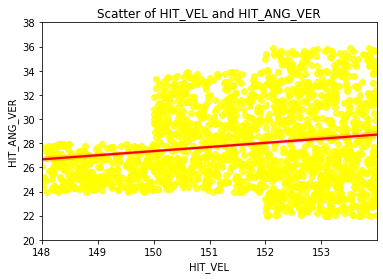

In [26]:
nothing_better2=nothing_better[:14]

nothing_better[:14]

def better(x):
    if x in nothing_better:
        return 1
    else:
        return 0
    

def better2(x):
    if x in nothing_better2:
        return 1
    else:
        return 0
    

all_hit['배럴타구여부']=all_hit.key.apply(lambda x : better2(x))

#산점도 그래프

ax = plt.subplots()
ax = sns.regplot(x='HIT_VEL', y='HIT_ANG_VER', data=all_hit[all_hit.배럴타구여부==1],scatter_kws={"color": "yellow"}, line_kws={"color": "red"}) 
#ax = sns.regplot(x='total_bill', y='tip', data=tips, fit_reg = False)

ax.set_title('Scatter of HIT_VEL and HIT_ANG_VER') # 제목지정
ax.set_xlabel('HIT_VEL') 
ax.set_ylabel('HIT_ANG_VER')
plt.ylim(20,38)
plt.show()